# Project: Image Classification and Regression

## Initialization

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# On some implementations of matplotlib, you may need to change this value
IMAGE_SIZE = 72

def generate_a_drawing(figsize, U, V, noise=0.0):
    fig = plt.figure(figsize=(figsize,figsize))
    ax = plt.subplot(111)
    plt.axis('Off')
    ax.set_xlim(0,figsize)
    ax.set_ylim(0,figsize)
    ax.fill(U, V, "k")
    fig.canvas.draw()
    imdata = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)[::3].astype(np.float32)
    imdata = imdata + noise * np.random.random(imdata.size)
    plt.close(fig)
    return imdata

def generate_a_rectangle(noise=0.0, free_location=False):
    figsize = 1.0    
    U = np.zeros(4)
    V = np.zeros(4)
    if free_location:
        corners = np.random.random(4)
        top = max(corners[0], corners[1])
        bottom = min(corners[0], corners[1])
        left = min(corners[2], corners[3])
        right = max(corners[2], corners[3])
    else:
        side = (0.3 + 0.7 * np.random.random()) * figsize
        top = figsize/2 + side/2
        bottom = figsize/2 - side/2
        left = bottom
        right = top
    U[0] = U[1] = top
    U[2] = U[3] = bottom
    V[0] = V[3] = left
    V[1] = V[2] = right
    return generate_a_drawing(figsize, U, V, noise)


def generate_a_disk(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        center = np.random.random(2)
    else:
        center = (figsize/2, figsize/2)
    radius = (0.3 + 0.7 * np.random.random()) * figsize/2
    N = 50
    U = np.zeros(N)
    V = np.zeros(N)
    i = 0
    for t in np.linspace(0, 2*np.pi, N):
        U[i] = center[0] + np.cos(t) * radius
        V[i] = center[1] + np.sin(t) * radius
        i = i + 1
    return generate_a_drawing(figsize, U, V, noise)

def generate_a_triangle(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        U = np.random.random(3)
        V = np.random.random(3)
    else:
        size = (0.3 + 0.7 * np.random.random())*figsize/2
        middle = figsize/2
        U = (middle, middle+size, middle-size)
        V = (middle+size, middle-size, middle-size)
    imdata = generate_a_drawing(figsize, U, V, noise)
    return [imdata, [U[0], V[0], U[1], V[1], U[2], V[2]]]

In [0]:
# On some implementations of matplotlib, you may need to change this value
IMAGE_SIZE = 72

def generate_a_drawing_couple(figsize, U, V, noise=0.0):
    fig = plt.figure(figsize=(figsize,figsize))
    ax = plt.subplot(111)
    plt.axis('Off')
    ax.set_xlim(0,figsize)
    ax.set_ylim(0,figsize)
    ax.fill(U, V, "k")
    fig.canvas.draw()
    imdata = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)[::3].astype(np.float32)
    imdata2 = imdata + noise * np.random.random(imdata.size)
    plt.close(fig)
    return [imdata2, imdata]

def generate_a_rectangle_couple(noise=0.0, free_location=False):
    figsize = 1.0    
    U = np.zeros(4)
    V = np.zeros(4)
    if free_location:
        corners = np.random.random(4)
        top = max(corners[0], corners[1])
        bottom = min(corners[0], corners[1])
        left = min(corners[2], corners[3])
        right = max(corners[2], corners[3])
    else:
        side = (0.3 + 0.7 * np.random.random()) * figsize
        top = figsize/2 + side/2
        bottom = figsize/2 - side/2
        left = bottom
        right = top
    U[0] = U[1] = top
    U[2] = U[3] = bottom
    V[0] = V[3] = left
    V[1] = V[2] = right
    return generate_a_drawing_couple(figsize, U, V, noise)


def generate_a_disk_couple(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        center = np.random.random(2)
    else:
        center = (figsize/2, figsize/2)
    radius = (0.3 + 0.7 * np.random.random()) * figsize/2
    N = 50
    U = np.zeros(N)
    V = np.zeros(N)
    i = 0
    for t in np.linspace(0, 2*np.pi, N):
        U[i] = center[0] + np.cos(t) * radius
        V[i] = center[1] + np.sin(t) * radius
        i = i + 1
    return generate_a_drawing_couple(figsize, U, V, noise)

def generate_a_triangle_couple(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        U = np.random.random(3)
        V = np.random.random(3)
    else:
        size = (0.3 + 0.7 * np.random.random())*figsize/2
        middle = figsize/2
        U = (middle, middle+size, middle-size)
        V = (middle+size, middle-size, middle-size)
    imdata = generate_a_drawing_couple(figsize, U, V, noise)
    return [imdata, [U[0], V[0], U[1], V[1], U[2], V[2]]]

We generate a sample of shapes with and without noise so as to visualize them.

we generate a sample of shapes with and without noise


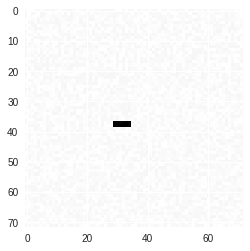

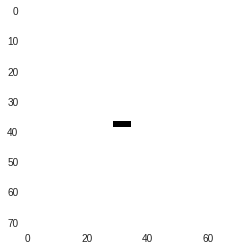

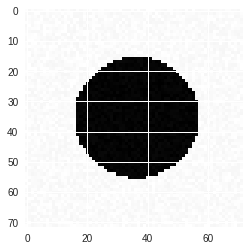

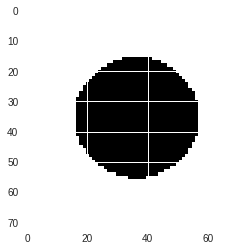

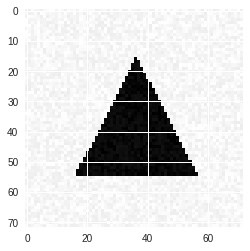

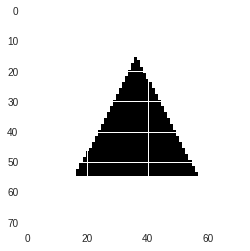

In [6]:
[im, imb] = generate_a_rectangle_couple(10, True)
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')
plt.show()
plt.imshow(imb.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')
plt.show()

[im, imb] = generate_a_disk_couple(10)
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')
plt.show()
plt.imshow(imb.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')
plt.show()

[[im, imb], v] = generate_a_triangle_couple(20, False)
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')
plt.show()
plt.imshow(imb.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')
plt.show()

In [0]:
def generate_dataset_classification(nb_samples, noise=0.0, free_location=False):
    # Getting im_size:
    im_size = generate_a_rectangle().shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros(nb_samples)
    print('Creating data:')
    for i in range(nb_samples):
        if i % 100 == 0:
            print(i)
        category = np.random.randint(3)
        if category == 0:
            X[i] = generate_a_rectangle(noise, free_location)
        elif category == 1: 
            X[i] = generate_a_disk(noise, free_location)
        else:
            [X[i], V] = generate_a_triangle(noise, free_location)
        Y[i] = category
    X = (X + noise) / (255 + 2 * noise)
    return [X, Y]

def generate_test_set_classification():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_classification(300, 20, True)
    Y_test = np_utils.to_categorical(Y_test, 3) 
    return [X_test, Y_test]

def generate_dataset_regression(nb_samples, noise=0.0):
    # Getting im_size:
    im_size = generate_a_triangle()[0].shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros([nb_samples, 6])
    print('Creating data:')
    for i in range(nb_samples):
        if i % 100 == 0:
            print(i)
        [X[i], Y[i]] = generate_a_triangle(noise, True)
    X = (X + noise) / (255 + 2 * noise)
    return [X, Y]

import matplotlib.patches as patches

def visualize_prediction(x, y):
    fig, ax = plt.subplots(figsize=(5, 5))
    I = x.reshape((IMAGE_SIZE,IMAGE_SIZE))
    ax.imshow(I, extent=[-0.15,1.15,-0.15,1.15],cmap='gray')
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])

    xy = y.reshape(3,2)
    tri = patches.Polygon(xy, closed=True, fill = False, edgecolor = 'r', linewidth = 5, alpha = 0.5)
    ax.add_patch(tri)

    plt.show()

def generate_test_set_regression():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_regression(300, 20)
    return [X_test, Y_test]
  
def generate_dataset_couple(nb_samples, noise=0.0, free_location=False):
    # Getting im_size:
    im_size = generate_a_rectangle().shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros([nb_samples,im_size])
    print('Creating data:')
    for i in range(nb_samples):
        if i % 100 == 0:
            print(i)
        category = np.random.randint(3)
        if category == 0:
            [X[i], Y[i]] = generate_a_rectangle_couple(noise, free_location)
        elif category == 1: 
            [X[i], Y[i]] = generate_a_disk_couple(noise, free_location)
        else:
            [tmp, V] = generate_a_triangle_couple(noise, free_location)
            [X[i], Y[i]] = tmp
    X = (X + noise) / (255 + 2 * noise)
    Y = (Y + noise) / (255 + 2 * noise)
    return [X, Y]

## Simple Classification


### Initialization

In [16]:
[X_train, Y_train] = generate_dataset_classification(300, 20)
y_train, x_train = Y_train, X_train
np.random.seed(42)
[X_test, Y_test] = generate_dataset_classification(300, 20, False)
Y_test = np_utils.to_categorical(Y_test, 3) 

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


### Using stochastic gradient descent

We use the simplest model with only one hidden fully connected layer.

In [19]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.utils import np_utils

y_train = np_utils.to_categorical(Y_train, 3)

nb_neurons = 2000
      
model = Sequential([
    Dense(3, input_shape=(5184,), activation='softmax')
])

print(model.output_shape)

from keras.optimizers import SGD

sgd = SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

model.fit(x_train, y_train, batch_size=32, epochs=100, verbose=1)


(None, 3)
Epoch 1/100
300/300 [==============================] - 0s 609us/step - loss: 1.6458 - acc: 0.3367
Epoch 2/100
300/300 [==============================] - 0s 177us/step - loss: 0.7331 - acc: 0.6500
Epoch 3/100
300/300 [==============================] - 0s 149us/step - loss: 0.5077 - acc: 0.7767
Epoch 4/100
300/300 [==============================] - 0s 147us/step - loss: 0.3895 - acc: 0.8333
Epoch 5/100
300/300 [==============================] - 0s 146us/step - loss: 0.3399 - acc: 0.8767
Epoch 6/100
300/300 [==============================] - 0s 160us/step - loss: 0.2626 - acc: 0.9400
Epoch 7/100
300/300 [==============================] - 0s 144us/step - loss: 0.2530 - acc: 0.9433
Epoch 8/100
300/300 [==============================] - 0s 152us/step - loss: 0.2243 - acc: 0.9433
Epoch 9/100
300/300 [==============================] - 0s 147us/step - loss: 0.2000 - acc: 0.9667
Epoch 10/100
300/300 [==============================] - 0s 142us/step - loss: 0.1848 - acc: 0.9667
Epoch 11/

In [21]:
model.evaluate(X_test, Y_test)

300/300 [==============================] - 0s 102us/step


[0.0454162239531676, 0.99]

We obtain an almost perfect validation accuracy on the test set.

### Using ADAM

We use the same model with a modified optimizer.

In [22]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.utils import np_utils

y_train = np_utils.to_categorical(Y_train, 3)

nb_neurons = 2000
      
model = Sequential([
    Dense(3, input_shape=(5184,), activation='softmax')
])

print(model.output_shape)

from keras.optimizers import SGD, Adam

adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

model.fit(x_train, y_train, batch_size=32, epochs=100, verbose=1)

(None, 3)
Epoch 1/100
300/300 [==============================] - 0s 763us/step - loss: 1.6804 - acc: 0.4067
Epoch 2/100
300/300 [==============================] - 0s 198us/step - loss: 0.7617 - acc: 0.6967
Epoch 3/100
300/300 [==============================] - 0s 176us/step - loss: 0.4851 - acc: 0.8067
Epoch 4/100
300/300 [==============================] - 0s 170us/step - loss: 0.3678 - acc: 0.9133
Epoch 5/100
300/300 [==============================] - 0s 170us/step - loss: 0.2954 - acc: 0.9333
Epoch 6/100
300/300 [==============================] - 0s 155us/step - loss: 0.2519 - acc: 0.9667
Epoch 7/100
300/300 [==============================] - 0s 155us/step - loss: 0.2329 - acc: 0.9600
Epoch 8/100
300/300 [==============================] - 0s 164us/step - loss: 0.2191 - acc: 0.9467
Epoch 9/100
300/300 [==============================] - 0s 180us/step - loss: 0.1899 - acc: 0.9667
Epoch 10/100
300/300 [==============================] - 0s 163us/step - loss: 0.1814 - acc: 0.9733
Epoch 11/

In [24]:
model.evaluate(X_test, Y_test)

300/300 [==============================] - 0s 285us/step


[0.01582394404957692, 0.9966666666666667]

Using Adam we obtain an almost perfect test accuracy too. We notice that the training convergence is quicker using Adam than using SGD (~45 steps vs ~20 steps).

## Visualization of the solution

We simply map the weights, using grey shades so as to represent their values.

[[-0.00117292 -0.02078193 -0.01051003]
 [-0.0104543   0.01492305 -0.03392503]
 [ 0.03349222 -0.00426094 -0.01692647]
 ...
 [ 0.00897726  0.01604574 -0.03511005]
 [ 0.00844674 -0.01217831  0.02614293]
 [-0.01758762  0.02304995 -0.02346941]]
(72, 72)


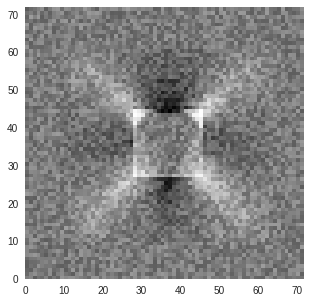

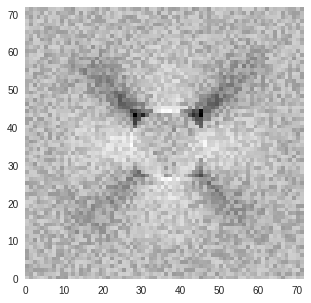

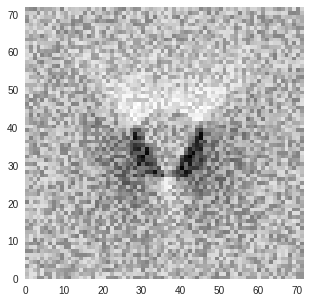

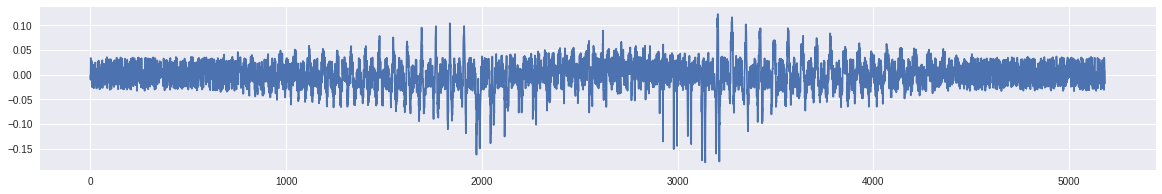

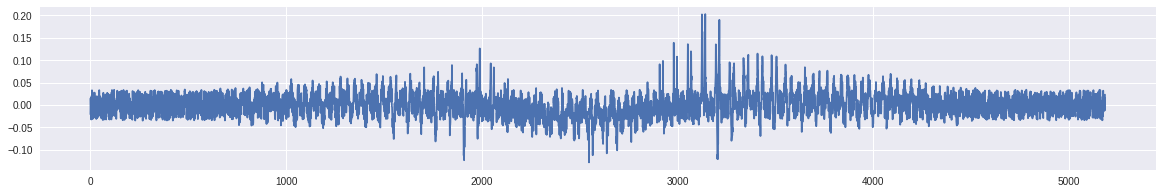

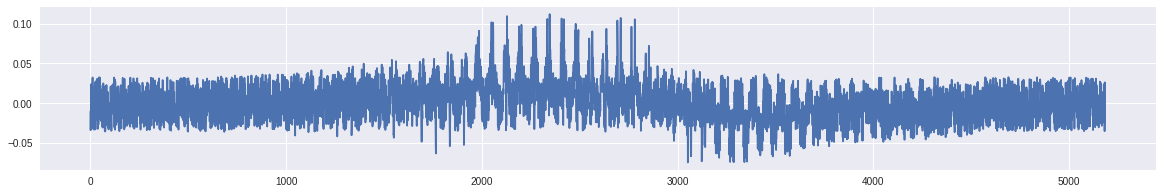

In [25]:
print(model.get_weights()[0])
weights = model.get_weights()[0]
weights0 = np.reshape(weights[:,0], (72, 72))

print(weights0.shape)

plt.figure(figsize=(5,5))
plt.pcolormesh(np.reshape(weights[:,0], (72, 72)))
plt.show()
plt.figure(figsize=(5,5))
plt.pcolormesh(np.reshape(weights[:,1], (72, 72)))
plt.show()
plt.figure(figsize=(5,5))
plt.pcolormesh(np.reshape(weights[:,2], (72, 72)))
plt.show()

plt.figure(figsize=(20,3))
plt.plot(weights[:,0])
plt.show()
plt.figure(figsize=(20,3))
plt.plot(weights[:,1])
plt.show()
plt.figure(figsize=(20,3))
plt.plot(weights[:,2])
plt.show()

We may distinguish the shapes looking at the weights. Using a larger training set or a longer training, those weights maps might have become less noisy, with shapes more clearly recognizable.

## A More Difficult Classification Problem

In order to train better our model and to improve accuracy, we chose to use an enlarged training set with 10000 examples.

In [28]:
[X_train, Y_train] = generate_dataset_classification(10000, 20, True)
[X_test, Y_test] = generate_test_set_classification()

Creating data:
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
Creating data:
0
100
200


In [34]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import Conv2D, MaxPooling2D, Flatten

from keras.utils import np_utils
y_train = np_utils.to_categorical(Y_train, 3)
x_train2 = X_train.reshape(X_train.shape[0], 72, 72, 1)

nb_neurons = 2000

model = Sequential()

model.add(Conv2D(32, (9, 9), activation='relu', input_shape=(72, 72, 1)))
print(model.output_shape)
model.add(Dropout(0.5))
model.add(MaxPooling2D(pool_size=(8, 8)))
print(model.output_shape)
model.add(Conv2D(32*32, (8, 8), activation='relu'))
model.add(Dropout(0.1))
print(model.output_shape)
model.add(Flatten())
print(model.output_shape)
model.add(Dense(3, activation = 'softmax'))
print(model.output_shape)

from keras.optimizers import SGD

sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

model.fit(x_train2, y_train, batch_size=32, epochs=10, verbose=1)

(None, 64, 64, 32)
(None, 8, 8, 32)
(None, 1, 1, 1024)
(None, 1024)
(None, 3)
Epoch 1/10
10000/10000 [==============================] - 6s 606us/step - loss: 0.6282 - acc: 0.7084
Epoch 2/10
10000/10000 [==============================] - 6s 558us/step - loss: 0.4123 - acc: 0.8020
Epoch 3/10
10000/10000 [==============================] - 6s 558us/step - loss: 0.4275 - acc: 0.8000
Epoch 4/10
10000/10000 [==============================] - 6s 560us/step - loss: 0.3906 - acc: 0.8144
Epoch 5/10
10000/10000 [==============================] - 6s 558us/step - loss: 0.5030 - acc: 0.7668
Epoch 6/10
10000/10000 [==============================] - 6s 560us/step - loss: 0.5456 - acc: 0.7496
Epoch 7/10
10000/10000 [==============================] - 6s 560us/step - loss: 0.5034 - acc: 0.7824
Epoch 8/10
10000/10000 [==============================] - 6s 558us/step - loss: 0.5216 - acc: 0.7713
Epoch 9/10
10000/10000 [==============================] - 6s 559us/step - loss: 0.4883 - acc: 0.7885
Epoch 10/10
1

In [36]:
x_test2 = X_test.reshape(X_test.shape[0], 72, 72, 1)
model.evaluate(x_test2, Y_test)

300/300 [==============================] - 0s 227us/step


[0.39823741316795347, 0.8466666666666667]

The model seems to be quite efficient since we obtain a testing accuracy of 85%. The problem was more difficult than the previous one, that's why we no longer have >99% test accuracy.

We notice that the test accuracy is far higher than the training one, so we suspect that such a high test accuracy relies mainly on a lucky random choice of test shapes. 

## A Regression Problem

### Initialization

In [0]:
[X_train, Y_train] = generate_dataset_regression(10000, 20)
[X_test, Y_test] = generate_test_set_regression()

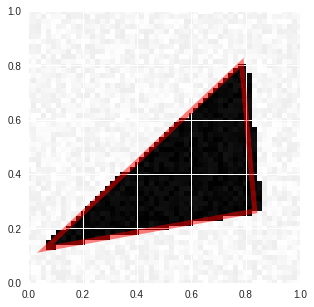

[[0.56166554 0.01933999 0.23411927 0.80964065 0.30174942 0.94933727]
 [0.60347567 0.06811877 0.55460629 0.22965657 0.34143753 0.31122027]
 [0.66852155 0.29310419 0.8775442  0.04175334 0.06910528 0.40392766]
 [0.58947764 0.41843238 0.46365282 0.1879611  0.77387155 0.44506879]
 [0.25076834 0.39890681 0.00211765 0.27967924 0.93534349 0.27378003]]
(10000, 5184)


In [38]:
visualize_prediction(X_train[5], Y_train[5])
print(Y_train[:5])

print(X_train.shape)

We normalize of the triangles, sorting their edges is a way such that its leftmost vertex is the first one and its rightmost the last one.


In [0]:
y_train = Y_train[:]
y_test = Y_test[:]

for i in range(len(y_train)):
  a, b, c = y_train[i][:2], y_train[i][2:4], y_train[i][4:]
  args = np.argsort(np.array([a[0], b[0], c[0]]))
  y_train[i] = np.concatenate(([a, b, c][args[0]], [a, b, c][args[1]], [a, b, c][args[2]]))

for i in range(len(y_test)):
  a, b, c = y_test[i][:2], y_test[i][2:4], y_test[i][4:]
  args = np.argsort(np.array([a[0], b[0], c[0]]))
  y_test[i] = np.concatenate(([a, b, c][args[0]], [a, b, c][args[1]], [a, b, c][args[2]]))

### Regression

We chose to use a rather simple convolutional network

In [41]:
x_train2 = X_train.reshape(X_train.shape[0], 72, 72, 1)

nb_neurons = 2000

model = Sequential()


model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(72, 72, 1)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32*4, (4, 4), activation='relu'))
model.add(Conv2D(32*4, (4, 4), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32*8, (2, 2), activation='relu'))
model.add(Conv2D(32*8, (2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32*16, (2, 2), activation='relu'))
model.add(Conv2D(32*16, (2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32*32, (2, 2), activation='relu'))
print(model.output_shape)
model.add(Flatten())
print(model.output_shape)
model.add(Dense(6))

#model.add(Conv2D(32, (72, 1), activation='relu', input_shape=(72, 72, 1)))

from keras.optimizers import SGD

sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd)

model.fit(x_train2, y_train, batch_size=32, epochs=10, verbose=1)

(None, 1, 1, 1024)
(None, 1024)
Epoch 1/10
10000/10000 [==============================] - 23s 2ms/step - loss: 0.0384
Epoch 2/10
10000/10000 [==============================] - 21s 2ms/step - loss: 0.0118
Epoch 3/10
10000/10000 [==============================] - 21s 2ms/step - loss: 0.0082
Epoch 4/10
10000/10000 [==============================] - 21s 2ms/step - loss: 0.0061
Epoch 5/10
10000/10000 [==============================] - 21s 2ms/step - loss: 0.0049
Epoch 6/10
10000/10000 [==============================] - 21s 2ms/step - loss: 0.0042
Epoch 7/10
10000/10000 [==============================] - 21s 2ms/step - loss: 0.0036
Epoch 8/10
10000/10000 [==============================] - 21s 2ms/step - loss: 0.0033
Epoch 9/10
10000/10000 [==============================] - 21s 2ms/step - loss: 0.0030
Epoch 10/10
10000/10000 [==============================] - 21s 2ms/step - loss: 0.0027


In [42]:
x_test2 = X_test.reshape(X_test.shape[0], 72, 72, 1)
model.evaluate(x_test2, y_test)

300/300 [==============================] - 1s 2ms/step


0.003555606572578351

[[0.31580988 0.7010249  0.8757388  0.21985656 0.96276265 0.63389695]]


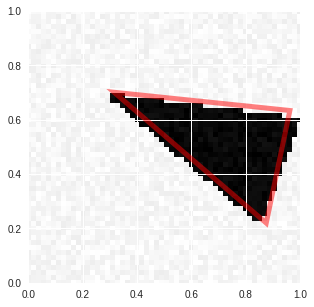

[[0.05887188 0.59846604 0.19706474 0.5027873  0.3461792  0.7577092 ]]


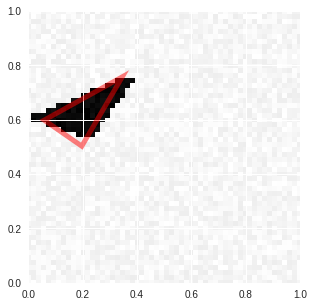

[[0.7106412  0.21777652 0.8060125  0.37751526 0.88534904 0.9169642 ]]


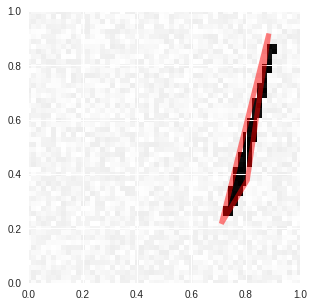

[[0.47258067 0.716349   0.5835967  0.51167977 0.8341307  0.05922213]]


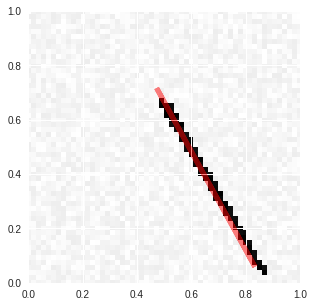

[[0.03130803 0.15951473 0.48107535 0.53573686 0.59054315 0.30442667]]


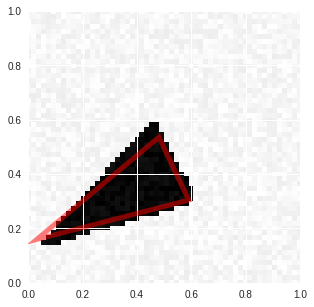

[[0.1629668  0.6617466  0.42624158 0.04293522 0.62892896 0.19703063]]


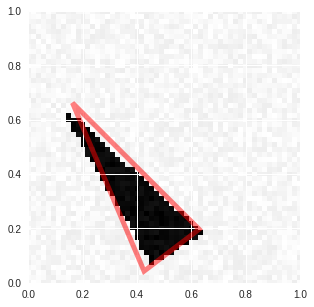

[[0.0261437 0.9175961 0.2001206 0.7740263 0.7689222 0.6091755]]


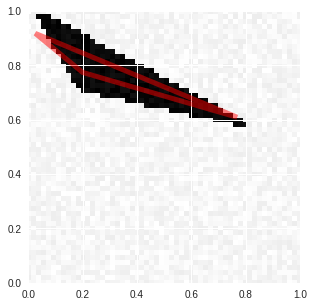

[[0.08195877 0.52790904 0.50262254 0.4331445  0.60391825 0.9734322 ]]


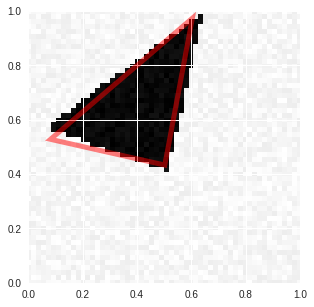

[[0.4515223  0.37515533 0.47539848 0.642483   0.9090117  0.3042964 ]]


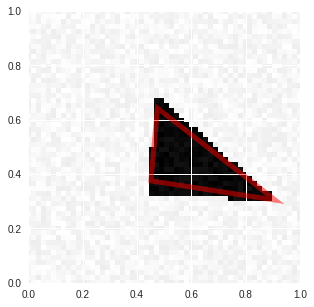

[[0.12433198 0.54811895 0.21072675 0.7801823  0.7998919  0.6487844 ]]


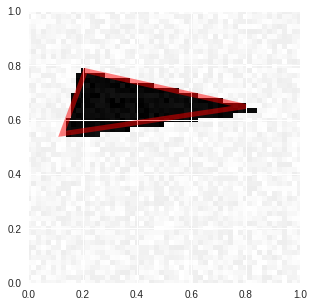

In [43]:
for i in range(10,20):
  X_testa = x_test2[i].reshape((1,72,72,1))
  Y_test_predicted = model.predict(X_testa)
  print(Y_test_predicted)
  visualize_prediction(X_testa, Y_test_predicted)

Despite of several errors, the neural networks since to understand well where are the triangle edges. We note that before we normalized the vertices, the results were almost random.

## Image Denoising

### Initialization

In [45]:
[X_train_denoise, Y_train_denoise] = generate_dataset_couple(10000, 20)

Creating data:
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900


In [46]:
[X_test_denoise, Y_test_denoise] = generate_dataset_couple(300, 20)

Creating data:
0
100
200


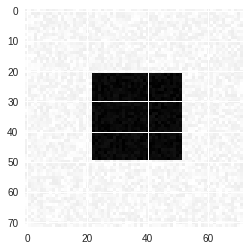

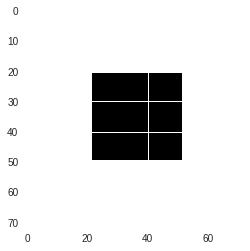

[[0.93220339 0.93220339 0.93220339 ... 0.93220339 0.93220339 0.93220339]
 [0.93220339 0.93220339 0.93220339 ... 0.93220339 0.93220339 0.93220339]
 [0.93220339 0.93220339 0.93220339 ... 0.93220339 0.93220339 0.93220339]
 [0.93220339 0.93220339 0.93220339 ... 0.93220339 0.93220339 0.93220339]
 [0.93220339 0.93220339 0.93220339 ... 0.93220339 0.93220339 0.93220339]]
(10000, 5184)


In [47]:
plt.imshow(X_train_denoise[5].reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')
plt.show()
plt.imshow(Y_train_denoise[5].reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')
plt.show()

print(Y_train_denoise[:5])

print(X_train_denoise.shape)

### Regression

We choose to implement U-net so as to denoise the shapes. After a few trials, we finally settled for Adam due to its increased convergence performance and a mean squared logarithmic error loss that suits well low values of noise.

In [85]:
from keras.layers import Dense, Activation, Dropout
from keras.models import Sequential, Model
from keras.layers import Dense, Activation, concatenate, UpSampling2D
from keras.layers import Conv2D, MaxPooling2D, Flatten, Input, merge
import keras.backend as K

y_train = Y_train_denoise.reshape(Y_train_denoise.shape[0], 72, 72, 1)
x_train = X_train_denoise.reshape(X_train_denoise.shape[0], 72, 72, 1)

main_input = Input(shape=(72,72,1), dtype='float32', name='main_input')
conv1a = Conv2D(64, 3, activation = 'relu', padding='same')(main_input)
conv1b = Conv2D(64, 3, activation = 'relu', padding='same')(conv1a)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1b)
#36
conv2a = Conv2D(128, 3, activation = 'relu', padding='same')(pool1)
conv2b = Conv2D(128, 3, activation = 'relu', padding='same')(conv2a)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2b)
#18
conv3a = Conv2D(256, 3, activation = 'relu', padding='same')(pool2)
conv3b = Conv2D(256, 3, activation = 'relu', padding='same')(conv3a)
pool3 = MaxPooling2D(pool_size=(2, 2))(conv3b)
#9
conv4a = Conv2D(256, 3, activation = 'relu', padding='same')(pool3)
conv4b = Conv2D(256, 3, activation = 'relu', padding='same')(conv4a)
#9
up7 = UpSampling2D(size = (2,2))(conv4b)
merge7 = concatenate([conv3b,up7])
up_conv7 = Conv2D(128, 2, activation = 'relu', padding='same')(merge7)
conv7b = Conv2D(128, 2, activation = 'relu', padding='same')(up_conv7)
#18
up8 = UpSampling2D(size = (2,2))(conv7b)
merge8 = concatenate([conv2b,up8])
up_conv8 = Conv2D(64, 2, activation = 'relu', padding='same')(merge8)
conv8b = Conv2D(64, 3, activation = 'relu', padding='same')(up_conv8)
#36
up9 = UpSampling2D(size = (2,2))(conv8b)
merge9 = concatenate([conv1b,up9])
up_conv9 = Conv2D(1, 2, activation = 'relu', padding='same')(merge9)
conv9b = Conv2D(1, 2, activation = 'relu', padding='same')(up_conv9)
#72

model = Model(inputs=[main_input], outputs=[conv9b])

from keras.optimizers import SGD, Adam

#sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss='mean_squared_logarithmic_error', optimizer=adam)

model.fit(x_train, y_train, batch_size=32, epochs=40, verbose=1)

Epoch 1/40
10000/10000 [==============================] - 64s 6ms/step - loss: 0.0055
Epoch 2/40
10000/10000 [==============================] - 55s 5ms/step - loss: 0.0012
Epoch 3/40
10000/10000 [==============================] - 55s 5ms/step - loss: 4.9189e-04
Epoch 4/40
10000/10000 [==============================] - 55s 5ms/step - loss: 3.0227e-04
Epoch 5/40
10000/10000 [==============================] - 55s 5ms/step - loss: 2.4487e-04
Epoch 6/40
10000/10000 [==============================] - 54s 5ms/step - loss: 1.9269e-04
Epoch 7/40
10000/10000 [==============================] - 55s 5ms/step - loss: 1.4633e-04
Epoch 8/40
10000/10000 [==============================] - 55s 5ms/step - loss: 1.2624e-04
Epoch 9/40
10000/10000 [==============================] - 55s 5ms/step - loss: 1.1973e-04
Epoch 10/40
10000/10000 [==============================] - 55s 5ms/step - loss: 1.1598e-04
Epoch 11/40
10000/10000 [==============================] - 55s 5ms/step - loss: 1.1004e-04
Epoch 12/40
1000

In [86]:
y_test = Y_test_denoise.reshape(Y_test_denoise.shape[0], 72, 72, 1)
x_test = X_test_denoise.reshape(X_test_denoise.shape[0], 72, 72, 1)
model.evaluate(x_test, y_test)

300/300 [==============================] - 5s 16ms/step


4.372301997743004e-06

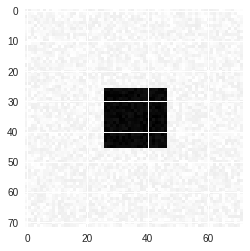

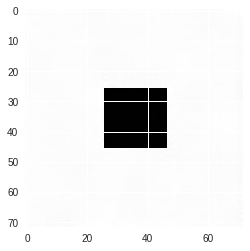

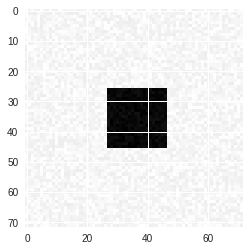

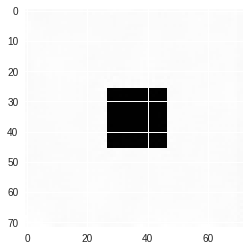

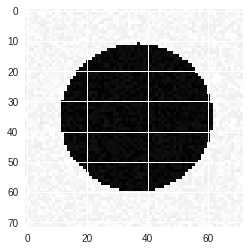

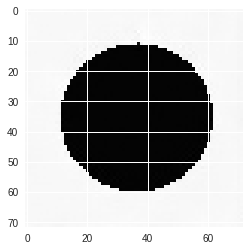

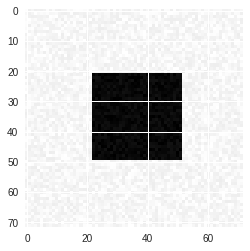

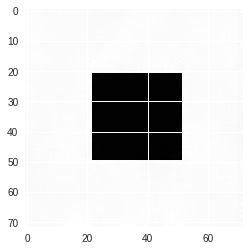

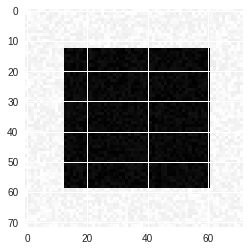

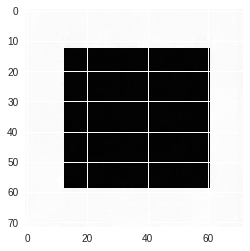

In [89]:
for i in range(5):
  X_testa = x_test[i].reshape((1,72,72,1))
  Y_test_predicted = model.predict(X_testa)
  plt.imshow(X_testa.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')
  plt.show()
  plt.imshow(Y_test_predicted.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')
  plt.show()

Though the denoising seems to be pretty efficient, we still notice a pale grey background on our outputs. Threshold nonlinearities would enable us to get rid of this noise.